# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
#df.head()

In [3]:
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [4]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [0]:
import matplotlib.pyplot as plt
def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [0]:
from sklearn.model_selection import train_test_split
y = df['Label']
X = df.drop('Label', axis=1)

X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


##### En primer lugar graficamos una matriz de correlacion, para identificar alta correlacion entre la variables, comprobando que no existe

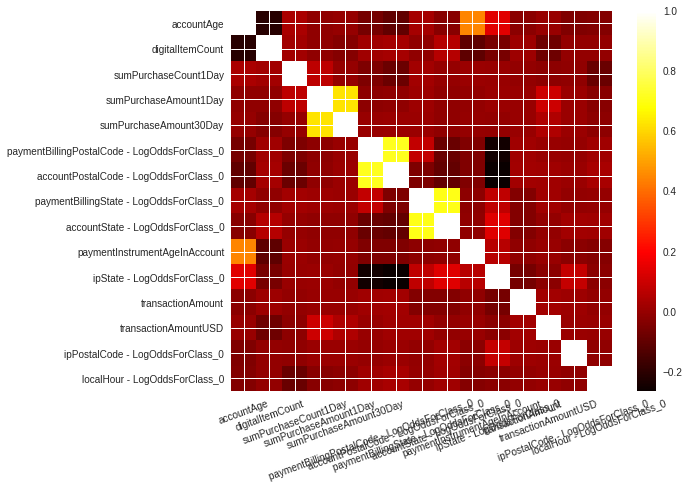

In [7]:
corr = X.corr()
plt.figure(figsize=(9,7))
plt.imshow(corr,cmap='hot')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns,rotation=20)
plt.yticks(range(len(corr)),corr.columns)
plt.show()

##### Solo para fines de graficar, se usara PCA con dos componentes

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)


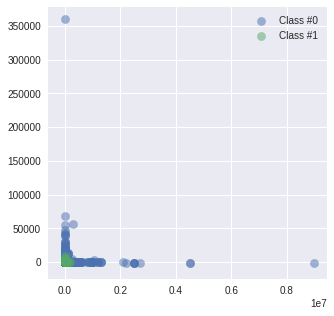

In [9]:
plot_two_classes(pca.fit_transform(X_train_), y_train,subplot=False,size=(5,5))

##### Se identifica el desbalaceo, al graficar en barrras la cantidad de observaciones con valor 0 vs la cantidad de observaciones con valor 1

In [10]:
(y==0).sum(),(y==1).sum()

(137924, 797)

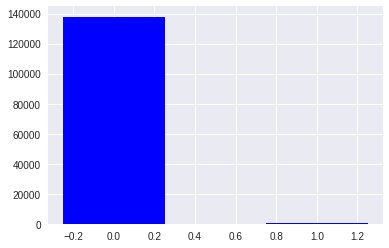

In [11]:
ax = plt.subplot(111)
ax.bar([0,1], [(y==0).sum(),(y==1).sum()],width=0.5,color='b',align='center')
plt.show()

In [0]:
#Se crea Datafrane, para almacenar todos los resultados obtenidos
dfResult = pd.DataFrame({'True':y_test})

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,fbeta_score


models = {'LogisticRegr': LogisticRegression(solver='lbfgs',max_iter=200),
          'DecisionTree': DecisionTreeClassifier(),
          'RandomForest': RandomForestClassifier(n_estimators=100)}

for model in models.keys():
    models[model].fit(X_train_, y_train)
    dfResult[model+'.1'] = models[model].predict(X_test_)
    
    print(model,'accuracy_score:{:.3f}'.format(accuracy_score(dfResult[model+'.1'],y_test)), 
          'f1_score:{:.3f}'.format(f1_score(dfResult[model+'.1'],y_test)), 
          'fbeta_score:{:.3f}'.format(fbeta_score(dfResult[model+'.1'],y_test,beta=10)))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


LogisticRegr accuracy_score:0.994 f1_score:0.000 fbeta_score:0.000
DecisionTree accuracy_score:0.989 f1_score:0.133 fbeta_score:0.122
RandomForest accuracy_score:0.994 f1_score:0.147 fbeta_score:0.488


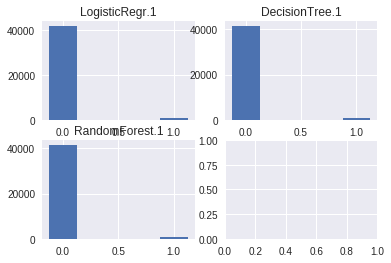

In [14]:
fig, ax = plt.subplots(2,2)
width = 0.25

ax[0,0].bar( [0,1], [(dfResult['LogisticRegr.1']==0).sum(),(y==1).sum()], width)
ax[0,0].set_title('LogisticRegr.1')
ax[0,1].bar( [0,1], [(dfResult['DecisionTree.1']==0).sum(),(y==1).sum()], width)
ax[0,1].set_title('DecisionTree.1')
ax[1,0].bar( [0,1], [(dfResult['RandomForest.1']==0).sum(),(y==1).sum()], width)
ax[1,0].set_title('RandomForest.1')
plt.show()

# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

##### En primer lugar se define lafuncion UnderSamplig 

In [0]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

##### Se aplica la función UnderSampling, validando los valores para X_u y y_u, lo mismo que se verifica que ya se encuentra balanceado.

In [16]:
X_u, y_u = UnderSampling(X_train_, np.array(y_train), 0.5, 1)
X_u.shape, y_u.shape

((1079, 15), (1079,))

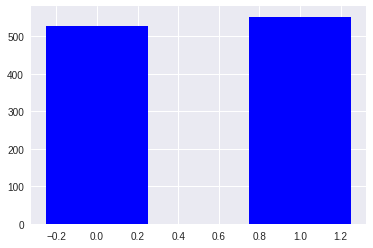

In [17]:
ax = plt.subplot()
ax.bar([0,1], [(y_u==0).sum(),(y_u==1).sum()],width=0.5,color='b',align='center')
plt.show()

In [18]:
for model in models.keys():
    models[model].fit(X_u, y_u)
    dfResult[model+'.2'] = models[model].predict(X_test_)
  
    print(model,'accuracy_score:{:.3f}'.format(accuracy_score(dfResult[model+'.2'],y_test)), 
          'f1_score:{:.3f}'.format(f1_score(dfResult[model+'.2'],y_test)), 
          'fbeta_score:{:.3f}'.format(fbeta_score(dfResult[model+'.2'],y_test,beta=10)))
  


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegr accuracy_score:0.541 f1_score:0.019 fbeta_score:0.010
DecisionTree accuracy_score:0.650 f1_score:0.022 fbeta_score:0.011
RandomForest accuracy_score:0.769 f1_score:0.036 fbeta_score:0.019


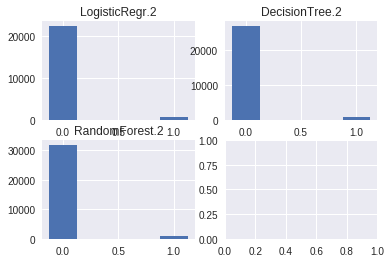

In [19]:
fig, ax = plt.subplots(2,2)
width = 0.25

ax[0,0].bar( [0,1], [(dfResult['LogisticRegr.2']==0).sum(),(y==1).sum()], width)
ax[0,0].set_title('LogisticRegr.2')
ax[0,1].bar( [0,1], [(dfResult['DecisionTree.2']==0).sum(),(y==1).sum()], width)
ax[0,1].set_title('DecisionTree.2')
ax[1,0].bar( [0,1], [(dfResult['RandomForest.2']==0).sum(),(y==1).sum()], width)
ax[1,0].set_title('RandomForest.2')
plt.show()

##### Se repite el ejercicio con la libreria imblearn.under_sampling 

In [0]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_u, y_u = rus.fit_resample(X_train_, y_train)

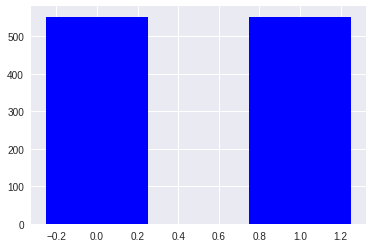

In [21]:
ax = plt.subplot()
ax.bar([0,1], [(y_u==0).sum(),(y_u==1).sum()],width=0.5,color='b',align='center')
plt.show()

In [22]:
for model in models.keys():
    models[model].fit(X_u, y_u)
    
    print(model,'accuracy_score:{:.3f}'.format(accuracy_score(models[model].predict(X_test_),y_test)), 
          'f1_score:{:.3f}'.format(f1_score(models[model].predict(X_test_),y_test)), 
          'fbeta_score:{:.3f}'.format(fbeta_score(models[model].predict(X_test_),y_test,beta=10)))
    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegr accuracy_score:0.582 f1_score:0.019 fbeta_score:0.010
DecisionTree accuracy_score:0.651 f1_score:0.023 fbeta_score:0.012
RandomForest accuracy_score:0.758 f1_score:0.036 fbeta_score:0.018


# Exercise 15.3

Same analysis using random-over-sampling

In [0]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    
    #print(n_samples)
    #print(n_samples_0)
    #print(n_samples_1)

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

In [24]:
X_u, y_u = OverSampling(np.array(X_train_), np.array(y_train), 0.5, 1)
X_train_.shape, y_train.shape

((97104, 15), (97104,))

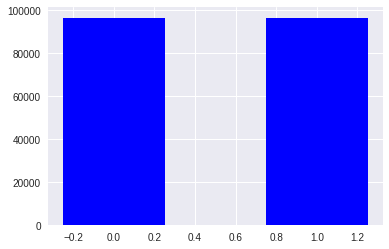

In [25]:
ax = plt.subplot()
ax.bar([0,1], [(y_u==0).sum(),(y_u==1).sum()],width=0.5,color='b',align='center')
plt.show()

In [26]:
for model in models.keys():
    models[model].fit(X_u, y_u)
    dfResult[model+'.3'] = models[model].predict(X_test_)
    
    print(model,'accuracy_score:{:.3f}'.format(accuracy_score(dfResult[model+'.3'],y_test)), 
          'f1_score:{:.3f}'.format(f1_score(dfResult[model+'.3'],y_test)), 
          'fbeta_score:{:.3f}'.format(fbeta_score(dfResult[model+'.3'],y_test,beta=10)))
    

LogisticRegr accuracy_score:0.649 f1_score:0.021 fbeta_score:0.011
DecisionTree accuracy_score:0.989 f1_score:0.108 fbeta_score:0.106
RandomForest accuracy_score:0.994 f1_score:0.162 fbeta_score:0.386


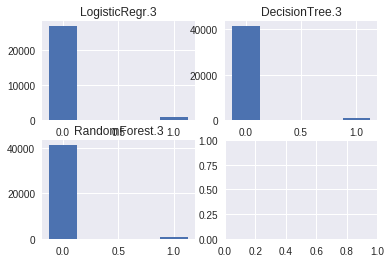

In [27]:
fig, ax = plt.subplots(2,2)
width = 0.25

ax[0,0].bar( [0,1], [(dfResult['LogisticRegr.3']==0).sum(),(y==1).sum()], width)
ax[0,0].set_title('LogisticRegr.3')
ax[0,1].bar( [0,1], [(dfResult['DecisionTree.3']==0).sum(),(y==1).sum()], width)
ax[0,1].set_title('DecisionTree.3')
ax[1,0].bar( [0,1], [(dfResult['RandomForest.3']==0).sum(),(y==1).sum()], width)
ax[1,0].set_title('RandomForest.3')
plt.show()

##### Se repite el ejercicio usando la libreria imblearn.over_sampling

In [0]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_u, y_u = ros.fit_resample(X_train_, y_train)

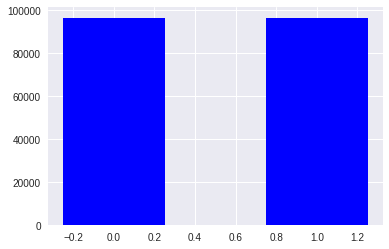

In [29]:
ax = plt.subplot()
ax.bar([0,1], [(y_u==0).sum(),(y_u==1).sum()],width=0.5,color='b',align='center')
plt.show()

In [30]:
for model in models.keys():
    models[model].fit(X_u, y_u)
   
    print(model,'accuracy_score:{:.3f}'.format(accuracy_score(models[model].predict(X_test_),y_test)), 
          'f1_score:{:.3f}'.format(f1_score(models[model].predict(X_test_),y_test)), 
          'fbeta_score:{:.3f}'.format(fbeta_score(models[model].predict(X_test_),y_test,beta=10)))    

LogisticRegr accuracy_score:0.622 f1_score:0.021 fbeta_score:0.011
DecisionTree accuracy_score:0.990 f1_score:0.134 fbeta_score:0.133
RandomForest accuracy_score:0.994 f1_score:0.156 fbeta_score:0.370


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [0]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    # Calculate the NearestNeighbors
    from sklearn.neighbors import NearestNeighbors
    nearest_neighbour_ = NearestNeighbors(n_neighbors=k + 1)
    nearest_neighbour_.fit(X[y==1])
    nns = nearest_neighbour_.kneighbors(X[y==1], 
                                    return_distance=False)[:, 1:]
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__=[]
    # Select one random neighbor for each example to use as base
    for i, sel in enumerate(sel_):
        nn__.append(np.random.choice(nns[sel]))
    
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

Target percentage 0.25 k  5
y.shape =  128736 y.mean() =  0.25


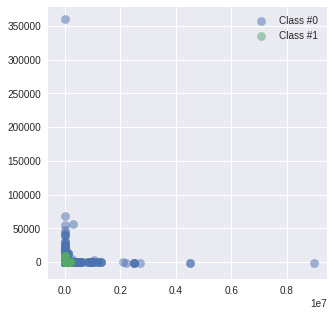

Target percentage 0.25 k  15
y.shape =  128736 y.mean() =  0.25


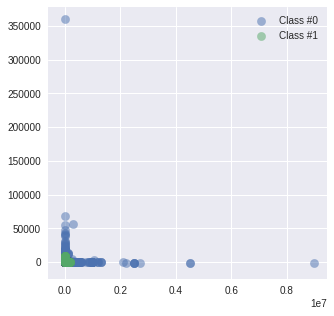

Target percentage 0.5 k  5
y.shape =  193104 y.mean() =  0.5


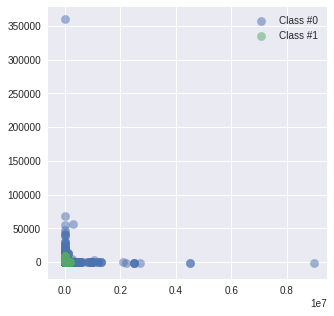

Target percentage 0.5 k  15
y.shape =  193104 y.mean() =  0.5


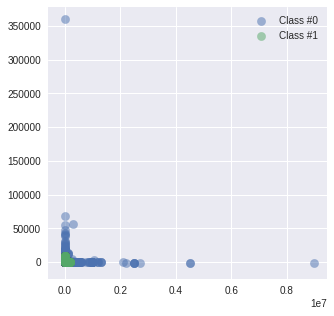

In [32]:
n_samples_0 = (y_train == 0).sum()
n_samples_1 = (y_train == 1).sum()

for target_percentage in [0.25, 0.5]:
  for k in [5, 15]:
    X_u, y_u = SMOTE(np.array(pca.fit_transform(X_train_)), np.array(y_train), target_percentage, k,seed=3)
    print('Target percentage', target_percentage, 'k ', k)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()

In [0]:
X_u, y_u = SMOTE(np.array(pca.fit_transform(X_train_)), np.array(y_train), 0.5, 5,seed=3)

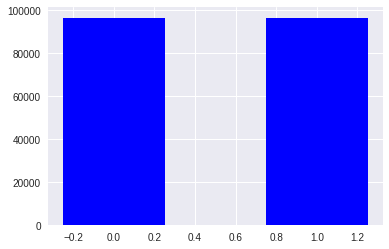

In [34]:
ax = plt.subplot()
ax.bar([0,1], [(y_u==0).sum(),(y_u==1).sum()],width=0.5,color='b',align='center')
plt.show()

##### Se hace el ejercicio con la libreria SMOTE de imblearn.over_sampling

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_u, y_u = sm.fit_resample(X_train_, y_train)

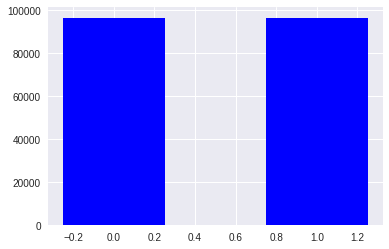

In [36]:
ax = plt.subplot()
ax.bar([0,1], [(y_u==0).sum(),(y_u==1).sum()],width=0.5,color='b',align='center')
plt.show()

In [37]:
for model in models.keys():
    models[model].fit(X_u, y_u)
    dfResult[model+'.4'] = models[model].predict(X_test_)
    
    print(model,'accuracy_score:{:.3f}'.format(accuracy_score(dfResult[model+'.4'],y_test)), 
          'f1_score:{:.3f}'.format(f1_score(dfResult[model+'.4'],y_test)), 
          'fbeta_score:{:.3f}'.format(fbeta_score(dfResult[model+'.4'],y_test,beta=10)))
    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegr accuracy_score:0.571 f1_score:0.020 fbeta_score:0.010
DecisionTree accuracy_score:0.984 f1_score:0.089 fbeta_score:0.067
RandomForest accuracy_score:0.993 f1_score:0.174 fbeta_score:0.274


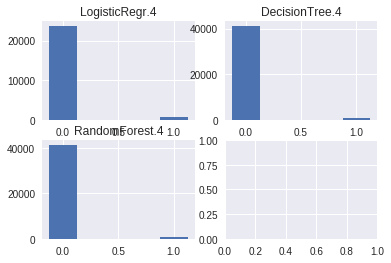

In [38]:
fig, ax = plt.subplots(2,2)
width = 0.25

ax[0,0].bar( [0,1], [(dfResult['LogisticRegr.4']==0).sum(),(y==1).sum()], width)
ax[0,0].set_title('LogisticRegr.4')
ax[0,1].bar( [0,1], [(dfResult['DecisionTree.4']==0).sum(),(y==1).sum()], width)
ax[0,1].set_title('DecisionTree.4')
ax[1,0].bar( [0,1], [(dfResult['RandomForest.4']==0).sum(),(y==1).sum()], width)
ax[1,0].set_title('RandomForest.4')
plt.show()

# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [0]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_u, y_u = ada.fit_resample(X_train_, y_train)

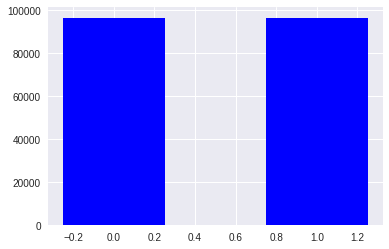

In [40]:
ax = plt.subplot()
ax.bar([0,1], [(y_u==0).sum(),(y_u==1).sum()],width=0.5,color='b',align='center')
plt.show()

In [41]:
for model in models.keys():
    models[model].fit(X_u, y_u)
    dfResult[model+'.5'] = models[model].predict(X_test_)
    
    print(model,'accuracy_score:{:.3f}'.format(accuracy_score(dfResult[model+'.5'],y_test)), 
          'f1_score:{:.3f}'.format(f1_score(dfResult[model+'.5'],y_test)), 
          'fbeta_score:{:.3f}'.format(fbeta_score(dfResult[model+'.5'],y_test,beta=10)))
        

LogisticRegr accuracy_score:0.317 f1_score:0.016 fbeta_score:0.008
DecisionTree accuracy_score:0.984 f1_score:0.073 fbeta_score:0.055
RandomForest accuracy_score:0.993 f1_score:0.186 fbeta_score:0.278


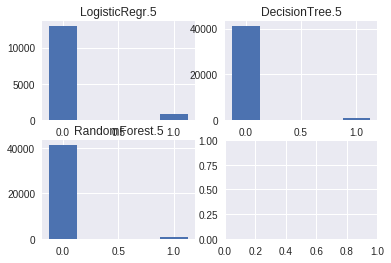

In [42]:
fig, ax = plt.subplots(2,2)
width = 0.25

ax[0,0].bar( [0,1], [(dfResult['LogisticRegr.5']==0).sum(),(y==1).sum()], width)
ax[0,0].set_title('LogisticRegr.5')
ax[0,1].bar( [0,1], [(dfResult['DecisionTree.5']==0).sum(),(y==1).sum()], width)
ax[0,1].set_title('DecisionTree.5')
ax[1,0].bar( [0,1], [(dfResult['RandomForest.5']==0).sum(),(y==1).sum()], width)
ax[1,0].set_title('RandomForest.5')
plt.show()

# Exercise 15.6 (3 points)

Compare and comment about the results

In [43]:
results = (dfResult.columns)[1:]
results
for result in results:
  print(result,'accuracy_score: {:.3f} '.format(accuracy_score(dfResult[result],dfResult['True'])))
  

LogisticRegr.1 accuracy_score: 0.994 
DecisionTree.1 accuracy_score: 0.989 
RandomForest.1 accuracy_score: 0.994 
LogisticRegr.2 accuracy_score: 0.541 
DecisionTree.2 accuracy_score: 0.650 
RandomForest.2 accuracy_score: 0.769 
LogisticRegr.3 accuracy_score: 0.649 
DecisionTree.3 accuracy_score: 0.989 
RandomForest.3 accuracy_score: 0.994 
LogisticRegr.4 accuracy_score: 0.571 
DecisionTree.4 accuracy_score: 0.984 
RandomForest.4 accuracy_score: 0.993 
LogisticRegr.5 accuracy_score: 0.317 
DecisionTree.5 accuracy_score: 0.984 
RandomForest.5 accuracy_score: 0.993 


#### Se puede observar que el mejor accuracy, promedio para los tres modelos corresponde al modelo 1 (desbalanceado); sin embargo esta conclusión es equivocada , toda vez que el resultado fue sesgado por la poca cantidad de valores "1", existentes tanto en conjunto de entrenamiento como en el conjunto de test.  Una vez se aplican los algoritmos de balanceo, el que presenta el mejor accuracy es el modelo 3 (random-over-sampling) con el RandomForest.

In [44]:
for result in results:
  print(result,'f1_score: {:.3f} '.format(f1_score(dfResult[result],dfResult['True'])))

LogisticRegr.1 f1_score: 0.000 
DecisionTree.1 f1_score: 0.133 
RandomForest.1 f1_score: 0.147 
LogisticRegr.2 f1_score: 0.019 
DecisionTree.2 f1_score: 0.022 
RandomForest.2 f1_score: 0.036 
LogisticRegr.3 f1_score: 0.021 
DecisionTree.3 f1_score: 0.108 
RandomForest.3 f1_score: 0.162 
LogisticRegr.4 f1_score: 0.020 
DecisionTree.4 f1_score: 0.089 
RandomForest.4 f1_score: 0.174 
LogisticRegr.5 f1_score: 0.016 
DecisionTree.5 f1_score: 0.073 
RandomForest.5 f1_score: 0.186 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


##### Respecto al f1_score = (2 * (precision * recall) / (precision + recall)).  "F-score is a simple formula to gather the scores of precision and recall. Imagine you want to predict labels for a binary classification task (positive or negative)"

##### Teniendo en cuenta la anterior definicion, observamos que en el modelo  1 (desbalanceado), a pesar de tener un alto accuracy para la regresion, el f1_score es 0, confirmando la poca confiabilidad que se puede tener en este modelo. 

In [45]:
for result in results: 
  print(result,'fbeta_score: {:.3f} '.format(fbeta_score(dfResult[result],dfResult['True'],beta=10)    ))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


LogisticRegr.1 fbeta_score: 0.000 
DecisionTree.1 fbeta_score: 0.122 
RandomForest.1 fbeta_score: 0.488 
LogisticRegr.2 fbeta_score: 0.010 
DecisionTree.2 fbeta_score: 0.011 
RandomForest.2 fbeta_score: 0.019 
LogisticRegr.3 fbeta_score: 0.011 
DecisionTree.3 fbeta_score: 0.106 
RandomForest.3 fbeta_score: 0.386 
LogisticRegr.4 fbeta_score: 0.010 
DecisionTree.4 fbeta_score: 0.067 
RandomForest.4 fbeta_score: 0.274 
LogisticRegr.5 fbeta_score: 0.008 
DecisionTree.5 fbeta_score: 0.055 
RandomForest.5 fbeta_score: 0.278 


In [46]:
dfResult.head(10)

,True,LogisticRegr.1,DecisionTree.1,RandomForest.1,LogisticRegr.2,DecisionTree.2,RandomForest.2,LogisticRegr.3,DecisionTree.3,RandomForest.3,LogisticRegr.4,DecisionTree.4,RandomForest.4,LogisticRegr.5,DecisionTree.5,RandomForest.5
136269,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1
45671,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
103047,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
31511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86154,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0
46719,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
114358,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
123399,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
21729,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
91442,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
